In [8]:
import matplotlib.pyplot as plt
import keras_ocr
import math
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [9]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)
def inpaint_text(img_path, pipeline):
    # read image
    img = keras_ocr.tools.read(img_path)
    # generate (word, box) tuples 
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
#         img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
        img = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
                 
    return(img, mask)

In [10]:
mypath = "../hateful_memes/img/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [ ]:
# Read Images
pipeline = keras_ocr.pipeline.Pipeline()
for i, file in enumerate(onlyfiles): 
    print(i, file)
#     if i ==1:
#         break
    image_path = mypath + "/" + file
    img = mpimg.imread(image_path)
    
    # Output Images
#     plt.imshow(img)
    
    
    img, mask = inpaint_text(image_path, pipeline)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite("../hateful_memes/text_free_img/"+file,img_rgb)
    
    mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    cv2.imwrite("../hateful_memes/img_mask/" + file,mask_rgb)


Looking for /Users/tianyaowang/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/tianyaowang/.keras-ocr/crnn_kurapan.h5
0 49081.png
1 69351.png
2 79142.png
3 17843.png
4 27980.png
5 24537.png
6 53967.png
7 15932.png
8 29013.png
9 10692.png
10 79624.png
11 47912.png
12 20751.png
13 39214.png
14 94586.png
15 28319.png
16 01953.png
17 20745.png
18 69423.png
19 15926.png
20 34056.png
21 14386.png
22 29761.png
23 51802.png
24 70614.png
25 64891.png
26 12907.png
27 45687.png
28 18594.png
29 40927.png
30 78260.png
31 68715.png
32 41387.png
33 84965.png
34 65231.png
35 42856.png
36 52489.png
37 75036.png
38 72981.png
39 35412.png
40 56837.png
41 27016.png
42 84971.png
43 71250.png
44 08793.png
45 56189.png
46 19846.png
47 61725.png
48 76259.png
49 70628.png
50 67354.png
51 23516.png
52 96420.png
53 34081.png
54 52304.png
55 94237.png
56 27943.png
57 30581.png
58 31847.png
59 80524.png
60 97058.png
61 90723.png
62 53768.png
63 52476.png
64 20786.png
65 16234.png
66 84756.png
67 50261.png
68 17894.

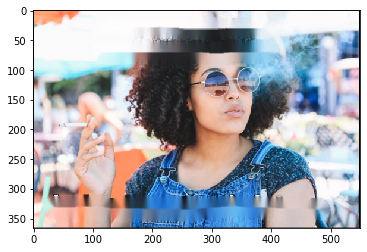

In [13]:
plt.imshow(img, interpolation='nearest')
plt.show()


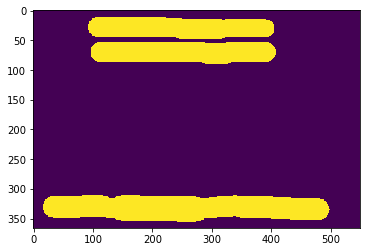

In [6]:
plt.imshow(mask, interpolation='nearest')
plt.show()


In [8]:
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
# cv2.imwrite("text_free_image_mask.jpg",mask_rgb)

True